# Import necessary libraries


In [1]:
import pandas as pd  # For loading files and performing tasks
import numpy as np   # For linear algebra operations
import seaborn as sns  # For data visualizations
import matplotlib.pyplot as plt  # For data visualizations
import plotly  # For interactive plotting
from scipy import stats  # For statistical operations
from scipy.stats import shapiro  # For the Shapiro-Wilk test
import seaborn as sns  # For additional data visualizations
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler 
# Ignore warnings to improve code readability


import warnings
warnings.filterwarnings('ignore')


# Load the dataset and perform initial data exploration.

In [2]:
# Read a CSV file named 'Price.csv' and store its contents in a DataFrame called 'df'
df = pd.read_csv('Price.csv')



In [3]:
df_shape = df.shape
print("The shape of the DataFrame is:", df_shape)


The shape of the DataFrame is: (4600, 18)


In [4]:
# Determine the dataset dimensions
num_rows = df.shape[0]  # Number of houses
num_columns = df.shape[1]  # Number of features

# Report on the dataset dimensions
print(f"The dataset comprises {num_rows} houses and {num_columns} features.")
print(f"Among the {num_columns} features, one of them is the 'price'. This means we have {num_columns - 1} different features that could potentially influence a house's price. Let's explore these features further.")


The dataset comprises 4600 houses and 18 features.
Among the 18 features, one of them is the 'price'. This means we have 17 different features that could potentially influence a house's price. Let's explore these features further.


In [5]:
df.head(3)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [6]:
df.tail(3)

#df = df.drop(df[df['price'] == 0].index)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4597,2014-07-09 00:00:00,416904.166667,3,2.5,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4,2.0,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3,2.5,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


The nunique() method is used to count the number of unique values in each column of a DataFrame.

In [7]:
# Calculate the number of unique values in each column
unique_counts = df.nunique()

# Display the count of unique values in a transposed format
print("Count of Unique Values in Each Column (Transposed):")
print(unique_counts)

Count of Unique Values in Each Column (Transposed):
date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64


In [8]:
# Count the number of duplicated rows in the DataFrame
duplicated_count = df.duplicated().sum()

# Print the result
print("Number of Duplicated Rows:", duplicated_count)

Number of Duplicated Rows: 0


In [9]:
# Calculate and print the value counts for the 'country' column
print("Value Counts for 'country' column:")

df['country'].value_counts()

Value Counts for 'country' column:


USA    4600
Name: country, dtype: int64

# Identify the types of variables present and categorize them.

In [10]:
num_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 
            'sqft_lot', 'floors', 'yr_built', 'yr_renovated']

cat_cols = ['waterfront', 'view', 'condition', 'street', 
            'city', 'statezip', 'country']

In [11]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')
Numerical Variables:
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


# Obtain insights about the data.

## Find the number of missing values for each column.


In [12]:
# Calculate the count of null values in each column
null_counts = df.isnull().sum()

# Create a DataFrame to store column names and their corresponding null counts
null_counts_df = pd.DataFrame({'Columns': null_counts.index, 'Null Count': null_counts.values})

# Create a dictionary to store data type, non-null counts, and null counts
info_data = {
    'Data Type': df.dtypes.tolist(),
    'Non-Null counts': df.count().tolist(),
    'Null counts': df.isnull().sum()
}

# Create a DataFrame to store the information
info_df = pd.DataFrame(info_data)

# Print data types, null and non-null counts info in a transposed format
print("Data Types, Null, and Non-null Counts Info:")
info_df.T

Data Types, Null, and Non-null Counts Info:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
Data Type,object,float64,int64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,object,object,object,object
Non-Null counts,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600
Null counts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Calculate summary statistics for numerical columns, such as mean, median, standard deviation, etc.

In [13]:
# Generate summary statistics for the numeric columns in the DataFrame
summary_statistics = df.describe()

# Display the summary statistics
print("Summary Statistics:")
summary_statistics


Summary Statistics:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


The $0 price is likely an invalid or outlier value, and it will be removed during exploratory data analysis (EDA) to ensure data quality and accuracy in subsequent analyses.

In [14]:

# Remove rows where the 'House Price' is $0
df = df[df['price'] > 0]


## Analyze the distribution of the numerical feature “price” using a distribution plot such as a histogram.

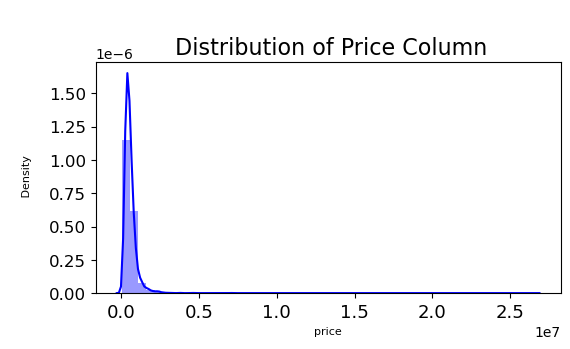

In [15]:
 plt.figure(figsize=(6,3))
plt.title('\n Distribution of Price Column', size=16, color='black')
plt.xlabel('\n Price \n', fontsize=8, color='black')
plt.ylabel('\n Density\n', fontsize=8, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df.price,color="blue")
plt.show()


The histogram's rightward tail indicates a positively skewed distribution with a few notably high values.

In [16]:
# Calculate the mean
mean = np.mean(df['price'])

# Calculate the median
median = np.median(df['price'])

# Calculate the mode
mode = np.bincount(df['price']).argmax()

# Print the results
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)

Mean: 557905.8991379443
Median: 465000.0
Mode: 300000


### Use the Shapiro-Wilk test to do a normality test and check if the “price” feature follows the normal distribution (if the p-value is greater than 0.05 then the feature follows the Normal distribution)

In [17]:
# Perform Shapiro-Wilk test
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df['price'])


print('shapiro_p_value ', shapiro_p_value)
print(' ')
# Check the p-value
if shapiro_p_value > 0.05:
    print("The 'price' feature follows a normal distribution (p-value =", shapiro_p_value, ")")
else:
    print("The 'price' feature does not follow a normal distribution (p-value =", shapiro_p_value, ")")


shapiro_p_value  0.0
 
The 'price' feature does not follow a normal distribution (p-value = 0.0 )


### Consider the Hypothesis "The year built has a significant impact on sale price.”. Do a hypothesis test using a t-test: split into two groups: properties built before 1990 and those built-in or after 1990. (alpha/confidence interval= 95%)

The first step is to visually inspect the standard deviations of the two groups using:


In [18]:
# Split the data into two groups based on the year built
before_1990_price_df = df[df['yr_built'] < 1990]['price']
after_1990_price_df = df[df['yr_built'] >= 1990]['price']


In [19]:
print('before_1990 :',np.var(before_1990_price_df))  
print('after_1990 :', np.var(after_1990_price_df))

before_1990 : 183059115410.90204
after_1990 : 589663985224.3052


Since the variances between the two groups are quite different, it suggests the variances are not equal.
Unequal variances violate the assumption of equal variance required for the Student's t-test.
Therefore, we should perform Welch's t-test instead, which does not assume equal variance. Welch's t-test 
adjusts the degrees of freedom to account for the unequal variance.

In [20]:
# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(before_1990_price_df, after_1990_price_df)

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis.')
    print('There is a significant difference in sale price between properties built before 1990 and those built in or after 1990.')
else:
    print('Fail to reject the null hypothesis.')
    print('There is no significant difference in sale price between properties built before 1990 and those built in or after 1990.')

t-statistic: -5.039544971748673
p-value: 4.84741878979518e-07
Reject the null hypothesis.
There is a significant difference in sale price between properties built before 1990 and those built in or after 1990.


### Consider the Hypothesis "The year built has a significant impact on sale price.Do a Hypothesis test using ANOVA: Assume that you have 3 groups: groupA has all houses built in 1990, groupB has all houses that were built in 2000 and groupC has all houses built in 2010 (alpha/confidence interval = 95%)


In [21]:
# Filter dataframe into 3 groups 
groupA = df[df['yr_built'] == 1990]['price']
groupB = df[df['yr_built'] == 2000]['price'] 
groupC = df[df['yr_built'] == 2010]['price']

# Calculate the F-statistic and p-value
F_statistic, p_value = f_oneway(groupA, groupB, groupC)

# Print the results
print('F-statistic:', F_statistic)
print('p-value:', p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis.')
    print('There is a significant difference in sale price between the three groups.')
else:
    print('Fail to reject the null hypothesis.')
    print('There is no significant difference in sale price between the three groups.')

F-statistic: 3.542687812955503
p-value: 0.031538378873099855
Reject the null hypothesis.
There is a significant difference in sale price between the three groups.


the conclusions of both these tests are the same: The year built significantly impacts the house sale price. However, the ANOVA test provides a more granular analysis by comparing three different years rather than just a split at 1990. This might reveal more subtle differences in property prices depending on the exact year of construction.

## Calculate the covariance matrix of the numerical features present in the dataset.

In [22]:
numerical_columns = df.select_dtypes(include=['number'])

cov_matrix = numerical_columns.cov()

# Print the covariance matrix
#print(covariance_matrix)
cov_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,3.180169e+11,107243.011741,149347.566706,2.401606e+08,1.041386e+09,46391.773902,6849.741324,104704.750865,14807.742591,1.834220e+08,5.673853e+07,365135.721487,-1.603606e+07
bedrooms,1.072430e+05,0.818292,0.384579,5.154355e+02,2.314311e+03,0.085846,-0.000404,0.079676,0.014058,3.753920e+02,1.400434e+02,3.809234,-5.512506e+01
bathrooms,1.493476e+05,0.384579,0.602721,5.619681e+02,3.052614e+03,0.204675,0.003978,0.122129,-0.063301,4.558634e+02,1.061047e+02,10.725916,-1.658831e+02
sqft_living,2.401606e+08,515.435491,561.968054,9.138398e+05,7.332107e+06,176.843701,8.336886,226.333289,-40.357187,7.152485e+05,1.985913e+05,8100.403334,-1.138412e+05
sqft_lot,1.041386e+09,2314.310999,3052.614074,7.332107e+06,1.293415e+09,82.222292,50.667820,1996.366664,22.556962,6.735723e+06,5.963837e+05,52619.349001,-7.420896e+05
floors,4.639177e+04,0.085846,0.204675,1.768437e+02,8.222229e+01,0.290016,0.000689,0.013181,-0.099547,2.402969e+02,-6.345315e+01,7.479526,-1.244616e+02
waterfront,6.849741e+03,-0.000404,0.003978,8.336886e+00,5.066782e+01,0.000689,0.006550,0.021530,0.000334,5.013703e+00,3.323183e+00,-0.077114,1.254083e+00
view,1.047048e+05,0.079676,0.122129,2.263333e+02,1.996367e+03,0.013181,0.021530,0.585795,0.032328,1.142029e+02,1.121304e+02,-1.511155,1.937442e+01
condition,1.480774e+04,0.014058,-0.063301,-4.035719e+01,2.255696e+01,-0.099547,0.000334,0.032328,0.455841,-1.018495e+02,6.149235e+01,-8.014748,-1.219924e+02
sqft_above,1.834220e+08,375.392046,455.863370,7.152485e+05,6.735723e+06,240.296856,5.013703,114.202904,-101.849538,7.300897e+05,-1.484123e+04,10335.097185,-1.349713e+05


## Create a heatmap of the covariance matrix. What do the colors in the heatmap represent?

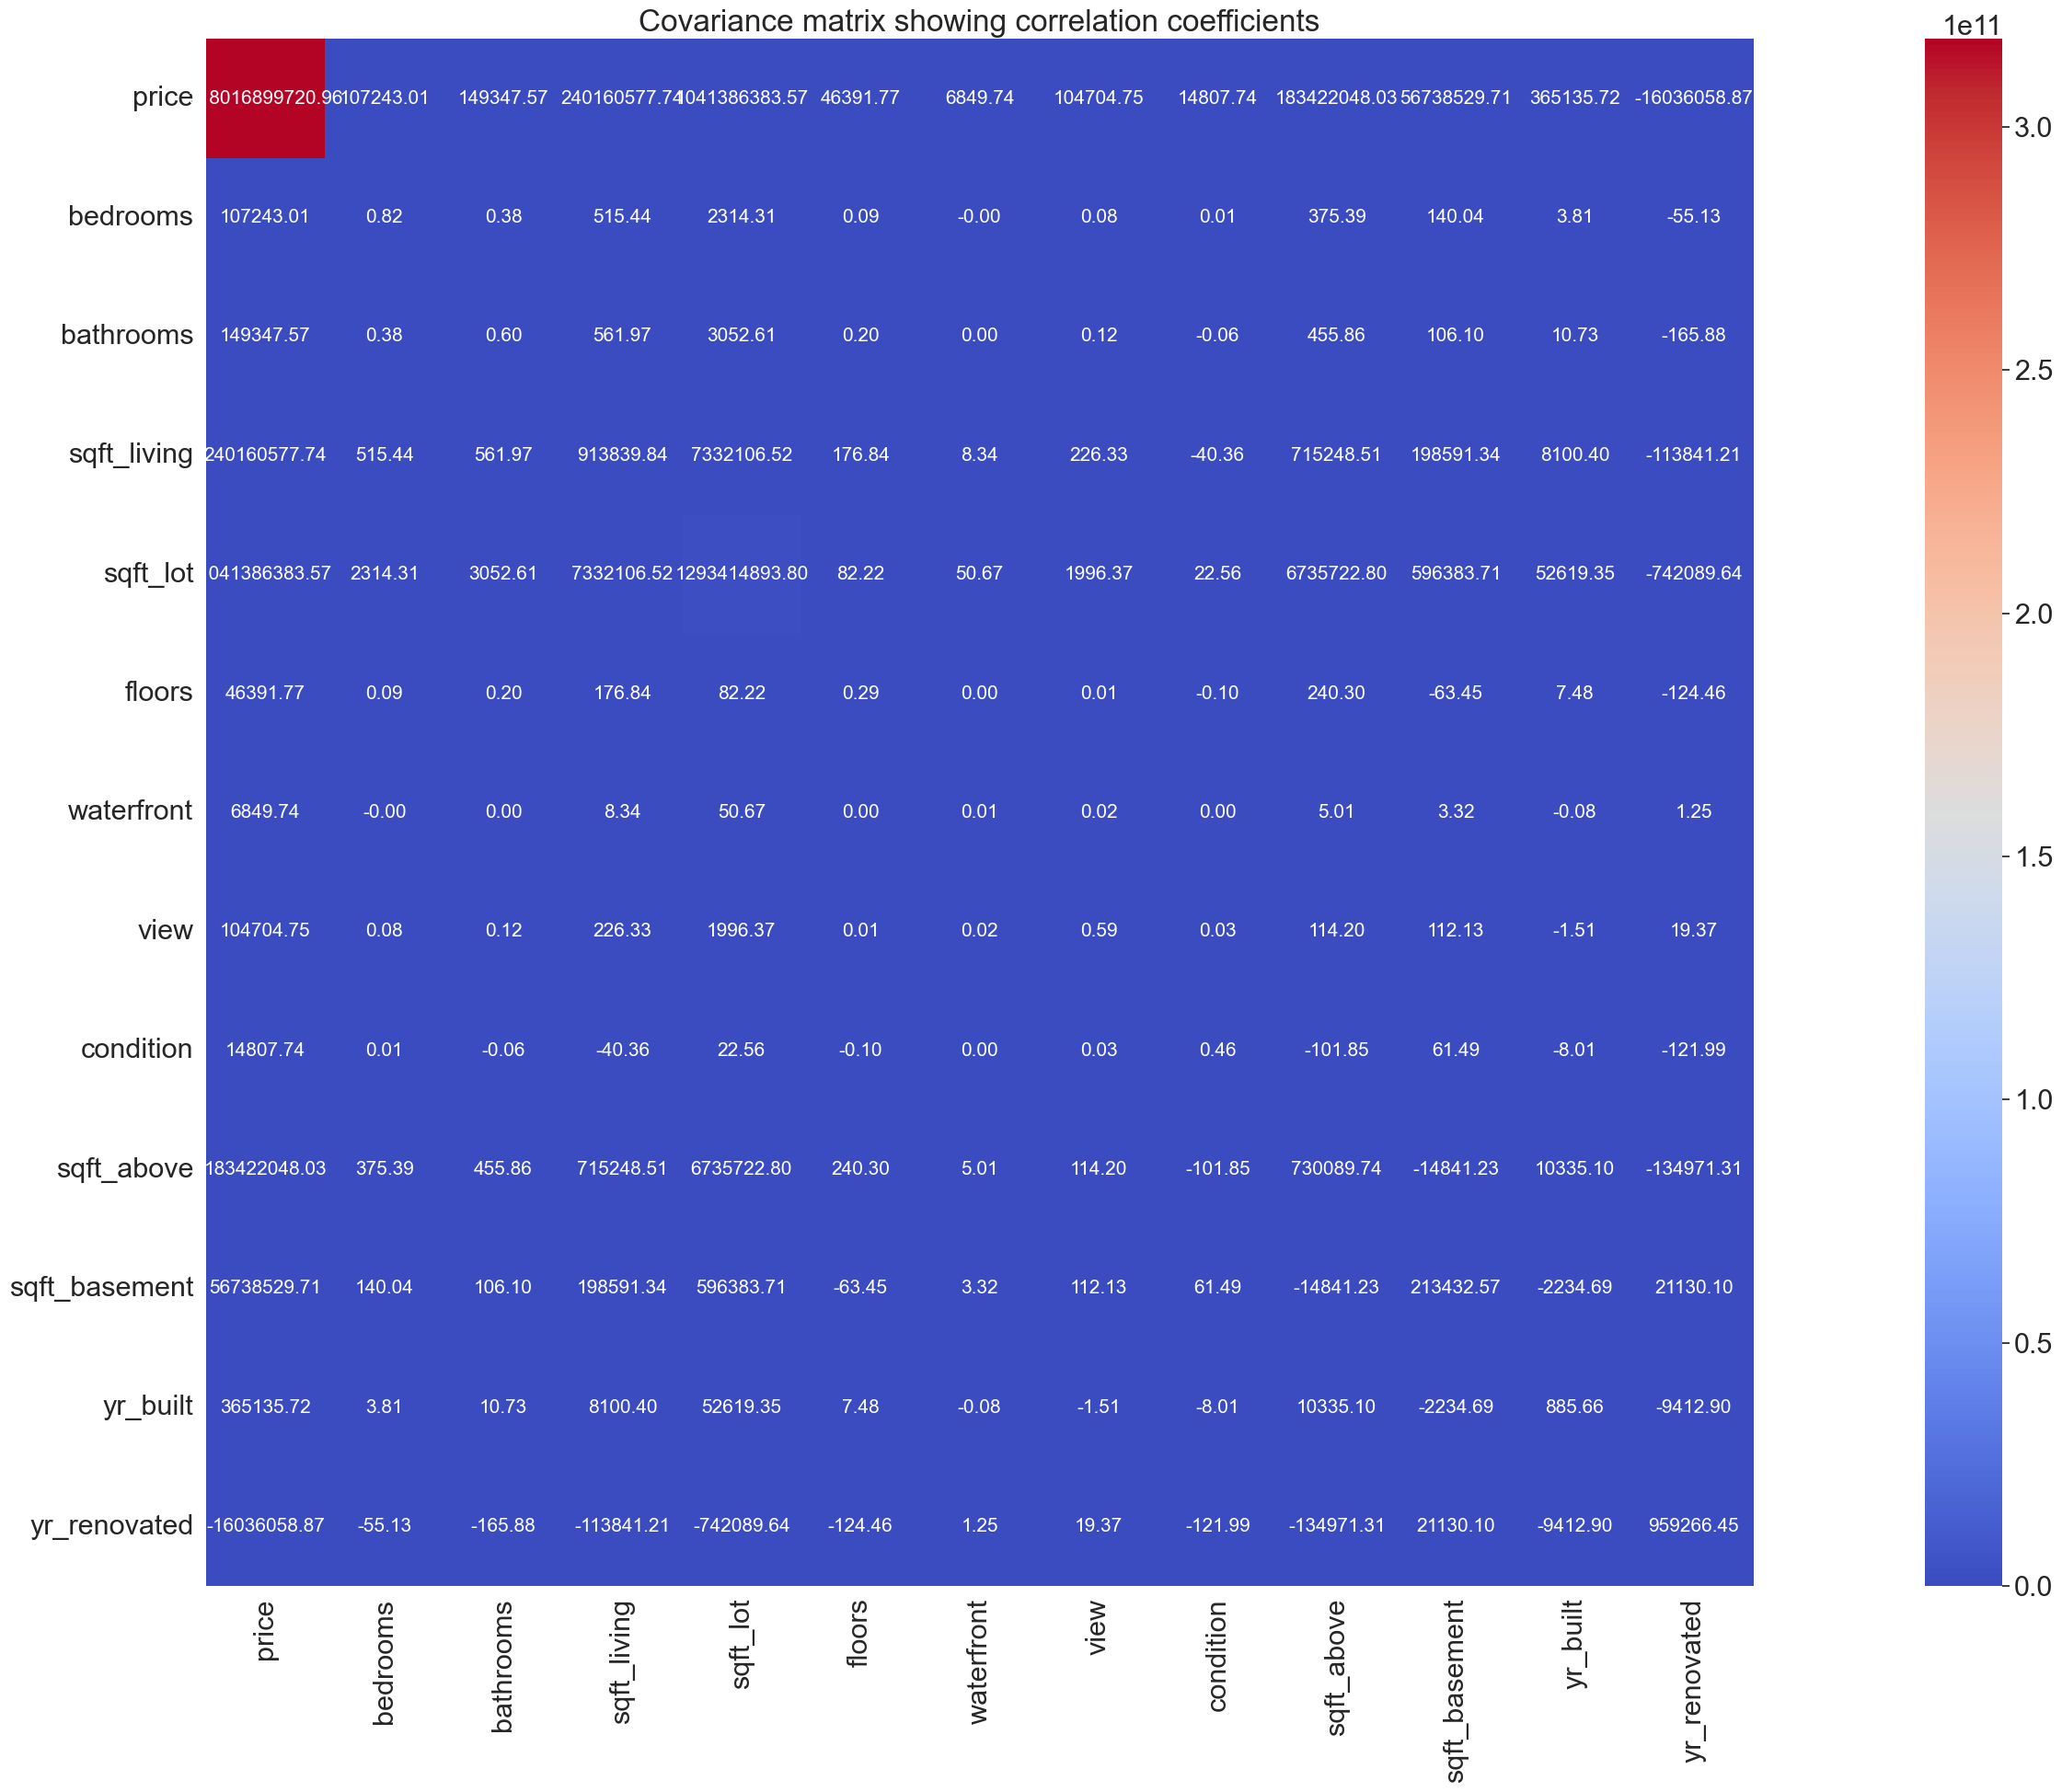

In [23]:

# Set the figure size
plt.figure(figsize=(38,20))  # Adjust the width and height as needed

# Set the font scale
sns.set(font_scale=2)

# Create the heatmap
hm = sns.heatmap(df.cov(),
                cbar=True,
                cmap="coolwarm",
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=numerical_columns.columns,
                xticklabels=numerical_columns.columns)

# Set the title
plt.title('Covariance matrix showing correlation coefficients')

# Automatically adjust the subplot parameters to give a tight layout
plt.tight_layout()

# Show the plot
plt.show()

###  Red: Strong positive correlation
###  Dark blue: Strong negative correlation
###  Light blue: Weak negative correlation
###  Light red: Weak positive correlation
###  Gray: No correlation


In [24]:
df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 
            'sqft_lot', 'floors', 'yr_built', 'yr_renovated']]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated
0,3.130000e+05,3,1.50,1340,7912,1.5,1955,2005
1,2.384000e+06,5,2.50,3650,9050,2.0,1921,0
2,3.420000e+05,3,2.00,1930,11947,1.0,1966,0
3,4.200000e+05,3,2.25,2000,8030,1.0,1963,0
4,5.500000e+05,4,2.50,1940,10500,1.0,1976,1992
...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,1954,1979
4596,5.343333e+05,3,2.50,1460,7573,2.0,1983,2009
4597,4.169042e+05,3,2.50,3010,7014,2.0,2009,0
4598,2.034000e+05,4,2.00,2090,6630,1.0,1974,0


## Compute the eigenvalue, eigenvector, and Rank of the covariance matrix.

In [25]:


# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Calculate the rank of the covariance matrix
rank = np.linalg.matrix_rank(cov_matrix)

# Print the results
print("Eigenvalues:")
print(eigenvalues.real)  # real parts of eigenvalues

print("\nEigenvectors:")
print(eigenvectors)



Eigenvalues:
[ 3.18020622e+11  1.29005375e+09  1.27554724e+06  8.87709303e+05
  2.92564548e+05  6.51808120e+02  5.70779037e-01  4.62690998e-01
  3.28579061e-01  2.33144342e-01  1.26056676e-01  5.69156820e-03
 -1.72005241e-09]

Eigenvectors:
[[ 9.99994126e-01 -3.29455463e-03 -8.61349755e-04 -3.72372446e-04
   1.16404433e-04 -6.22239184e-06 -1.75545388e-07  8.02325603e-08
  -2.94408839e-08 -8.24208030e-08 -1.26351178e-08  1.11553959e-08
  -6.51741334e-15]
 [ 3.37244246e-07  1.52350320e-06  3.87301779e-04  2.16749308e-04
  -3.14578999e-04  4.92375142e-04 -8.06919427e-01 -5.29128141e-01
  -8.39699162e-02 -2.30306898e-01 -9.37009605e-02 -5.64094163e-03
  -5.54682672e-08]
 [ 4.69647031e-07  1.98878088e-06  4.53851099e-04  1.22858545e-04
  -1.50085458e-04 -7.09307750e-03 -1.55346011e-01 -1.77636784e-01
  -1.27822400e-01  7.56210198e-01  5.96715827e-01  1.83898819e-04
   1.97088895e-08]
 [ 7.55247937e-04  5.07640283e-03  6.63307034e-01  3.47032285e-01
  -3.25923532e-01  2.48455772e-03  2.96965

In [26]:
# Print the rank of the covariance matrix
print("\nRank of the covariance matrix:", rank)


Rank of the covariance matrix: 12


## Calculate the inverse of the covariance matrix

In [27]:
# Calculate the inverse of the covariance matrix
cov_matrix_inverse = np.linalg.inv(cov_matrix)

# Print the inverse covariance matrix
print("Inverse of the Covariance Matrix:")
print(cov_matrix_inverse)


Inverse of the Covariance Matrix:
[[ 4.11920327e-12  2.43690410e-07 -2.98290164e-07 -8.24274012e-10
   3.12102423e-12 -1.18191651e-07 -1.96990698e-06 -2.13927493e-07
  -1.43581147e-07 -6.43973469e-10 -4.24326932e-10  1.00536966e-08
  -2.90321423e-11]
 [ 2.43690410e-07  2.07006377e+00 -7.35318390e-01 -1.16778430e-03
   2.46298245e-06  1.68715834e-01  9.86721488e-01  1.85964461e-01
  -1.40636548e-01  1.87641664e-03 -2.20510463e-03  4.52368451e-03
  -6.10567293e-05]
 [-2.98290164e-07 -7.35318390e-01  5.43767817e+00 -6.34837479e-03
   1.98980160e-06 -1.77775854e+00 -2.56869310e-02 -5.00786245e-02
  -1.69161113e-01  1.05806247e-03  5.29031233e-03 -3.29603712e-02
   1.11471545e-04]
 [-9.35192501e-10 -3.45113044e-04 -3.53555943e-03  1.18737757e+09
  -2.17753215e-08  1.64575517e-03  2.80914563e-03 -1.02705389e-03
   8.40570059e-05 -1.18737757e+09 -1.18737757e+09  1.00813400e-05
   1.52484189e-07]
 [ 3.12102423e-12  2.46298245e-06  1.98980160e-06 -7.18021092e-09
   8.34168455e-10  7.38786834e-0

### Create a matrix X with the selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built'] and Y with the target feature and Print matrix X and Y

In [28]:

selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built']
X = df[selected_features].values
Y = df['price'].values


print("Matrix X:")
print(X)
print("\nVector Y:")
print(Y)




Matrix X:
[[3.0000e+00 7.9120e+03 1.5000e+00 1.9550e+03]
 [5.0000e+00 9.0500e+03 2.0000e+00 1.9210e+03]
 [3.0000e+00 1.1947e+04 1.0000e+00 1.9660e+03]
 ...
 [3.0000e+00 7.0140e+03 2.0000e+00 2.0090e+03]
 [4.0000e+00 6.6300e+03 1.0000e+00 1.9740e+03]
 [3.0000e+00 8.1020e+03 2.0000e+00 1.9900e+03]]

Vector Y:
[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


## Compute the transpose of matrix X and print the transpose matrix.

In [29]:
X_transpose = X.T
print("\nTranspose of matrix X:")
print(X_transpose)



Transpose of matrix X:
[[3.0000e+00 5.0000e+00 3.0000e+00 ... 3.0000e+00 4.0000e+00 3.0000e+00]
 [7.9120e+03 9.0500e+03 1.1947e+04 ... 7.0140e+03 6.6300e+03 8.1020e+03]
 [1.5000e+00 2.0000e+00 1.0000e+00 ... 2.0000e+00 1.0000e+00 2.0000e+00]
 [1.9550e+03 1.9210e+03 1.9660e+03 ... 2.0090e+03 1.9740e+03 1.9900e+03]]


## solve the linear system of equations 'X * a = Y,' where 'a' represents the coefficients

In [30]:
a, residuals, rank, singular_values = np.linalg.lstsq(X, Y, rcond=None)
print("\nCoefficients (a):")
print(a)



Coefficients (a):
[ 1.18262984e+05  5.92488251e-01  1.28189525e+05 -2.37093824e+01]


### Once you've obtained the coefficient 'a,' create a scatter plot that visually represents the relationship between one of the selected features and the target variable 'price.' Include a regression line on the plot to illustrate the linear relationship. Provide insights and interpretations based on the scatter plot.


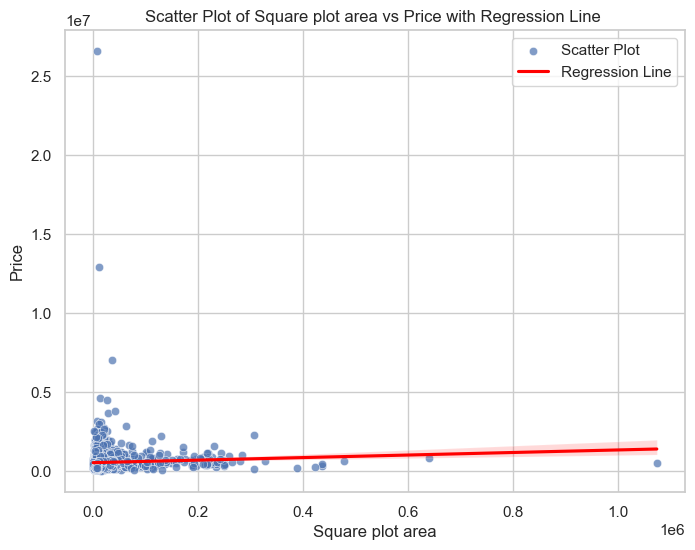

In [31]:

feature = X[:, 1] 
price = Y

# Calculate the predicted values using the coefficients 'a'
y_pred = a[1] * feature

# Set Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature, y=price, label='Scatter Plot', alpha=0.7)
sns.regplot(x=feature, y=price, scatter=False, color='red', label='Regression Line')

plt.xlabel('Square plot area')
plt.ylabel('Price')
plt.title('Scatter Plot of Square plot area vs Price with Regression Line ')

plt.legend()
plt.show()

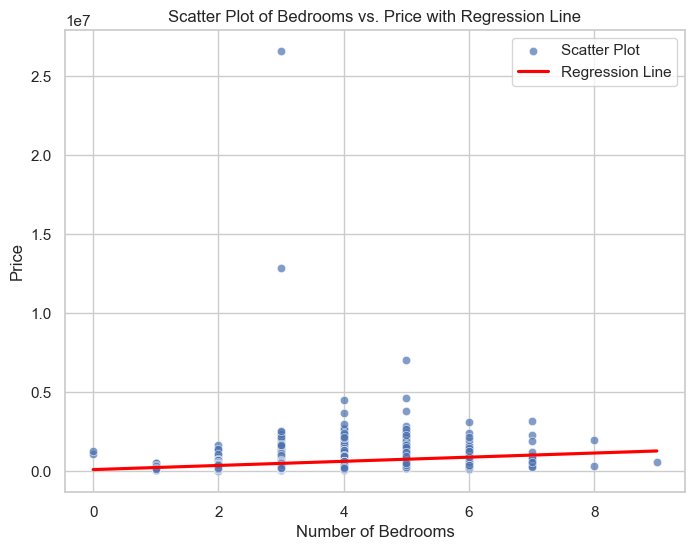

In [32]:
# Select the feature and target
feature = X[:, 0]  # Assuming 'sqft_lot' is the first feature (index 1)
price = Y

# Calculate the predicted values using the coefficients 'a'
y_pred = a[0] * feature

# Set Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature, y=price, label='Scatter Plot', alpha=0.7)
sns.regplot(x=feature, y=price, scatter=False, color='red', label='Regression Line')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Bedrooms vs. Price with Regression Line')

plt.legend()
plt.show()